<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/World_Happiness_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness EDA

<hr>

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

print("Necessary packages have been included successfully!")

Necessary packages have been included successfully!


In [56]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/World%20Happiness%20Data/2015.csv'
data = pd.read_csv(url,error_bad_lines=False)
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [59]:
print('Country Counts unique')
countries=data.Country.unique()
for country in countries:
    print(country)

Country Counts unique
Switzerland
Iceland
Denmark
Norway
Canada
Finland
Netherlands
Sweden
New Zealand
Australia
Israel
Costa Rica
Austria
Mexico
United States
Brazil
Luxembourg
Ireland
Belgium
United Arab Emirates
United Kingdom
Oman
Venezuela
Singapore
Panama
Germany
Chile
Qatar
France
Argentina
Czech Republic
Uruguay
Colombia
Thailand
Saudi Arabia
Spain
Malta
Taiwan
Kuwait
Suriname
Trinidad and Tobago
El Salvador
Guatemala
Uzbekistan
Slovakia
Japan
South Korea
Ecuador
Bahrain
Italy
Bolivia
Moldova
Paraguay
Kazakhstan
Slovenia
Lithuania
Nicaragua
Peru
Belarus
Poland
Malaysia
Croatia
Libya
Russia
Jamaica
North Cyprus
Cyprus
Algeria
Kosovo
Turkmenistan
Mauritius
Hong Kong
Estonia
Indonesia
Vietnam
Turkey
Kyrgyzstan
Nigeria
Bhutan
Azerbaijan
Pakistan
Jordan
Montenegro
China
Zambia
Romania
Serbia
Portugal
Latvia
Philippines
Somaliland region
Morocco
Macedonia
Mozambique
Albania
Bosnia and Herzegovina
Lesotho
Dominican Republic
Laos
Mongolia
Swaziland
Greece
Lebanon
Hungary
Honduras
Tajik

In [60]:
pd.isnull(data).sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [61]:
data.dropna(how='any',axis='rows')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [62]:
print('Regions Counts:\n')
print(data['Region'].value_counts())

Regions Counts:

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


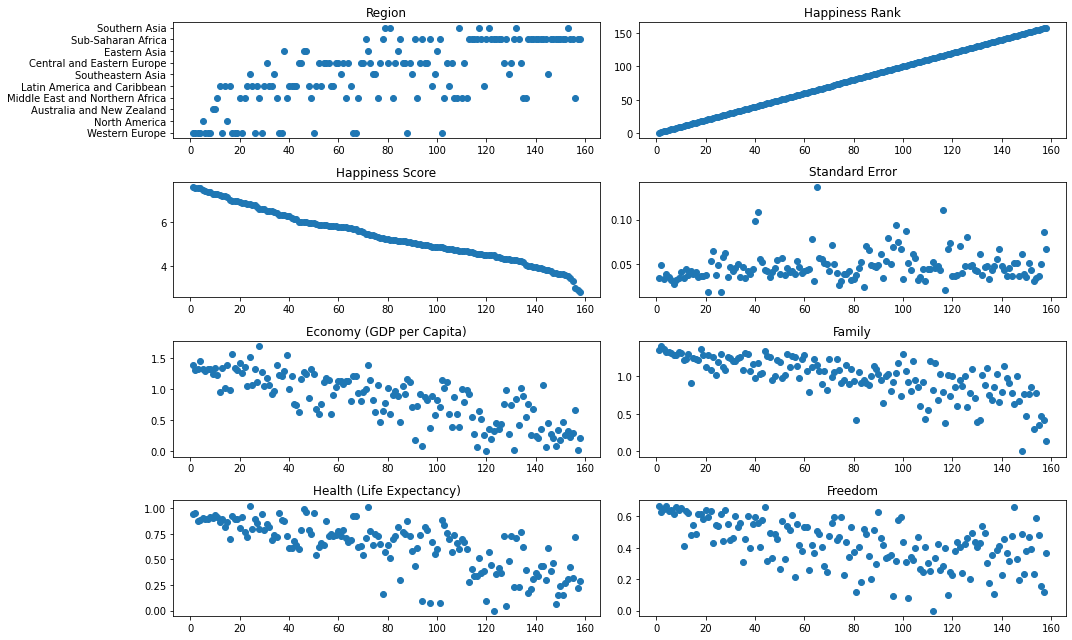

In [63]:
data_filter=data.iloc[:,1:9]
data_filter.columns
#Incomplete detection will be performed.
for i, col in enumerate(data_filter.columns.values):
    plt.subplot(4, 2, i+1)
    plt.scatter(np.arange(1,159), data[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(15, 9)
    plt.tight_layout()
plt.show()

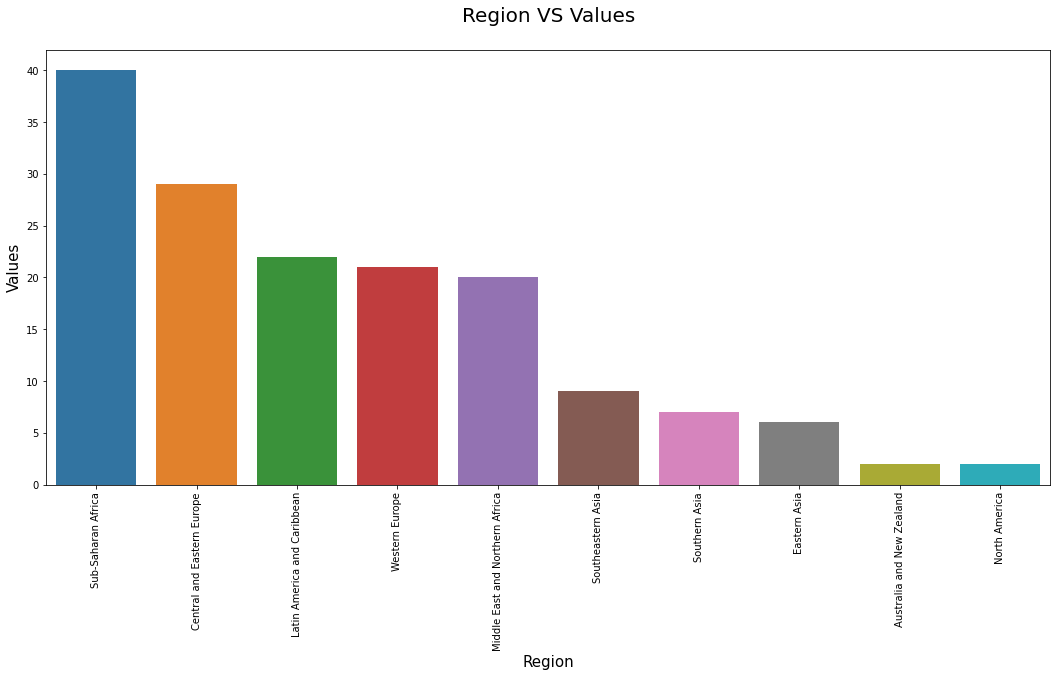

In [64]:
data_region=data['Region'].value_counts()
data_rvalues=data_region.values
data_rregion=data_region.index
plt.figure(figsize=(18,8))
sns.barplot(x=data_rregion,y=data_rvalues)
plt.xticks(rotation=90)
plt.xlabel('Region',size=15)
plt.ylabel('Values',size=15)
plt.title('Region VS Values\n',size=20)
plt.show()

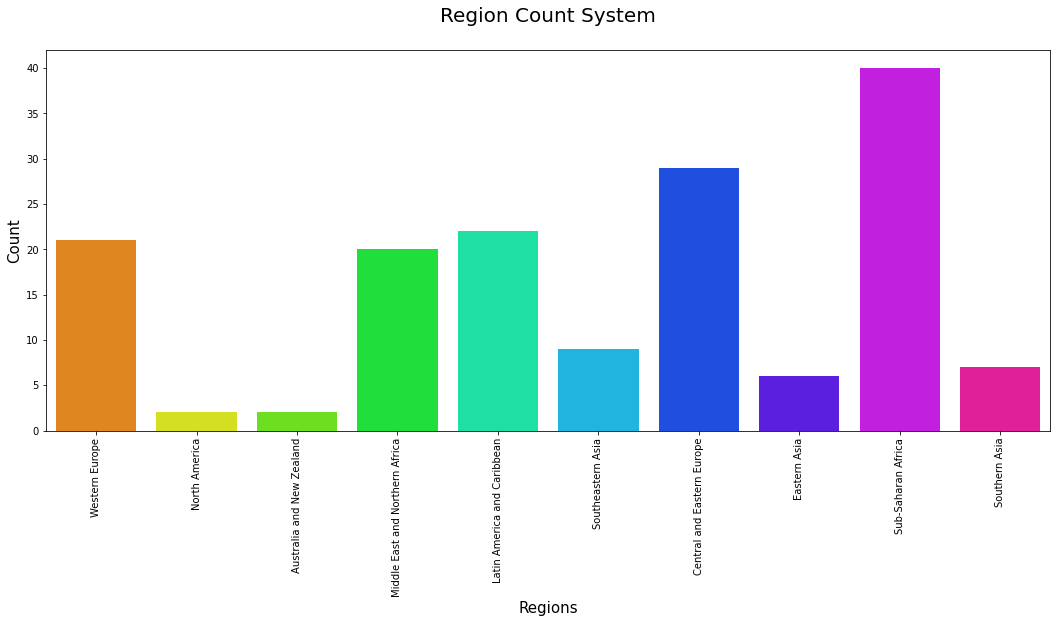

In [65]:
plt.figure(figsize=(18,7))
sns.countplot(x = data.Region,palette='hsv')
plt.xticks(rotation=90)
plt.xlabel('Regions',size=15)
plt.ylabel('Count',size=15)
plt.title('Region Count System\n',size=20)
plt.show()

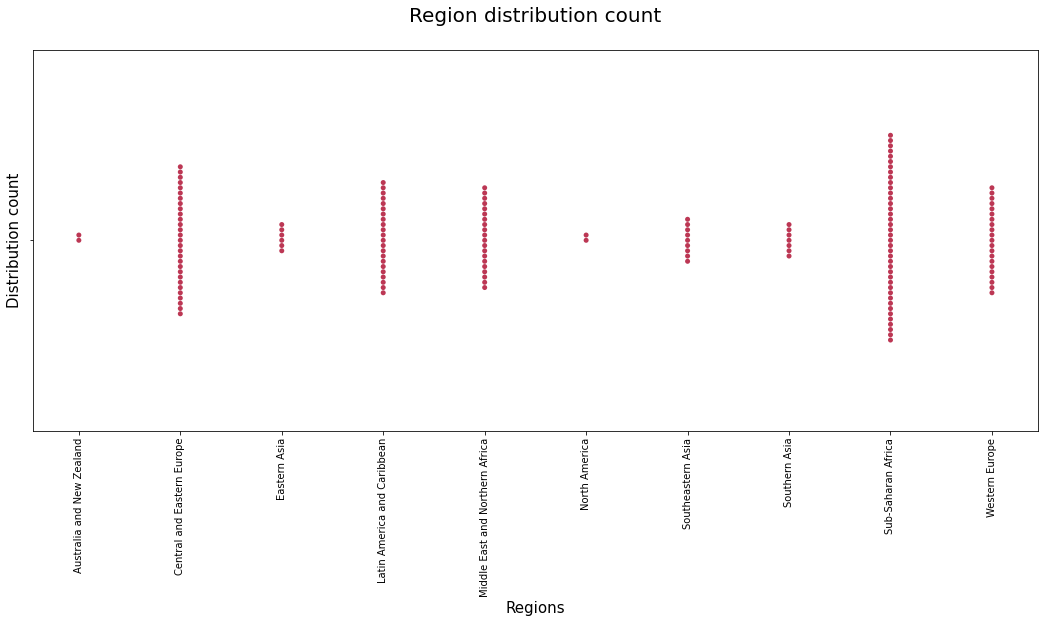

In [66]:
plt.figure(figsize=(18,7))
sns.swarmplot(x = data.Region,palette='inferno')
plt.xticks(rotation=90)
plt.xlabel('Regions',size=15)
plt.ylabel('Distribution count',size=15)
plt.title('Region distribution count\n',size=20)
plt.show()

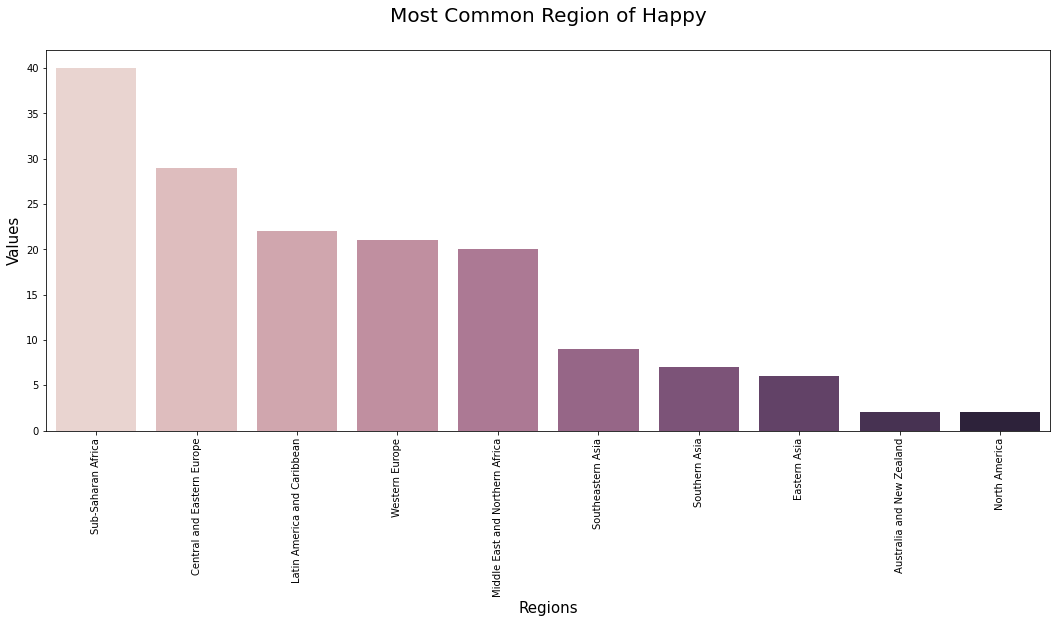

In [67]:
plt.figure(figsize=(18,7))
ax=sns.barplot(x=data_rregion,y=data_rvalues,palette=sns.cubehelix_palette(len(data_rregion)))
plt.xlabel('Regions',size=15)
plt.ylabel('Values',size=15)
plt.xticks(rotation=90)
plt.title('Most Common Region of Happy\n',size=20)
plt.show()

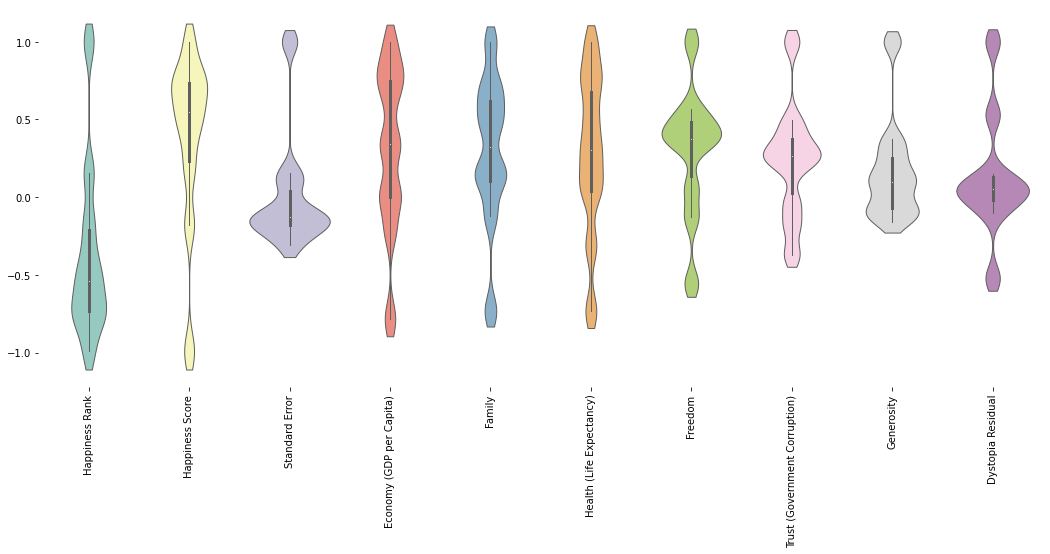

In [68]:
plt.figure(figsize=(18,7))
sns.violinplot(data=data.corr(), palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90)
plt.show()

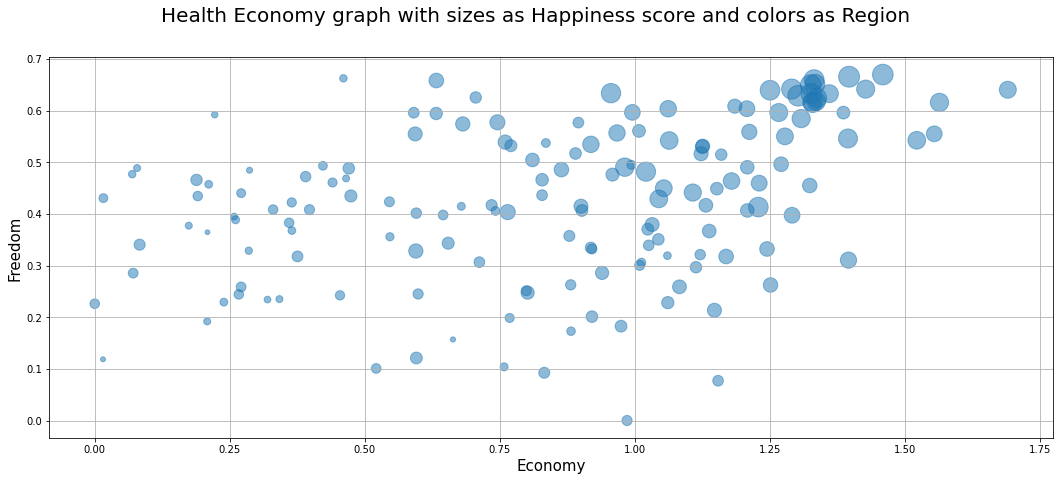

In [69]:
plt.figure(figsize=(18,7))
plt.scatter(data['Economy (GDP per Capita)'], data['Freedom'], s=(data['Happiness Score']**3), alpha=0.5)
plt.grid(True)

plt.xlabel("Economy",size=15)
plt.ylabel("Freedom",size=15)

plt.suptitle("Health Economy graph with sizes as Happiness score and colors as Region", fontsize=20)

plt.show()

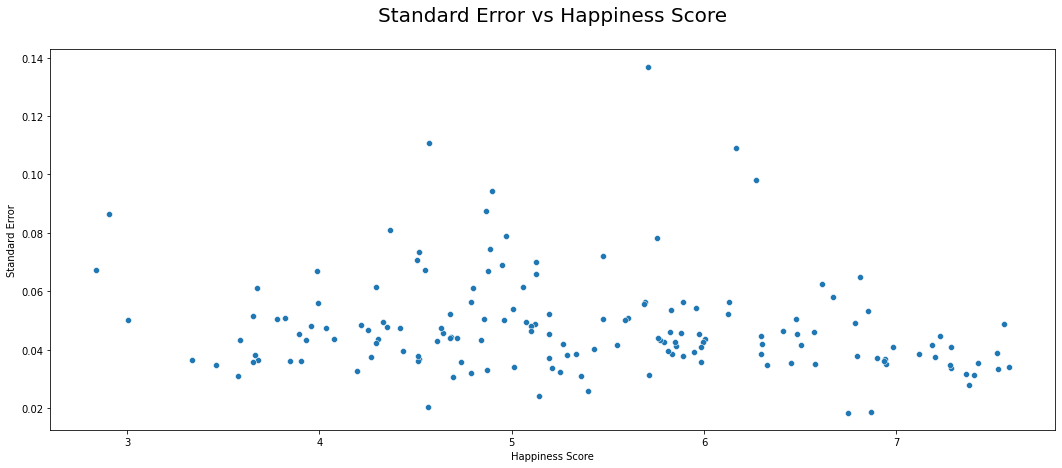

In [70]:
plt.figure(figsize=(18,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Happiness Score", y="Standard Error",data=data,palette='inferno_r')
plt.title("Standard Error vs Happiness Score\n",size=20)
plt.show()

In [75]:
data.columns=['Country','Region','Happiness_Rank','Happiness_Score','Standart_Error','Economy_GPD_Capital','Family','Healt_Life_Expectancy','Freedom','Trust_Goverment_Corruption','Generosity','Dystopia_Residual']
data['Happiness_Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158])

In [76]:
values_region=data.Region.value_counts().values
values_region

array([40, 29, 22, 21, 20,  9,  7,  6,  2,  2])

In [77]:
Economy_GPD_Capital=[]
for i,region in enumerate(data.Region.value_counts().index):
    Economy_GPD_Capital.append(sum(data[data['Region']==region].Economy_GPD_Capital)/values_region[i])
Economy_GPD_Capital

[0.38047299999999995,
 0.942438275862069,
 0.8768154545454546,
 1.2985957142857143,
 1.0669734999999998,
 0.7890544444444445,
 0.5604857142857143,
 1.15178,
 1.29188,
 1.3604]

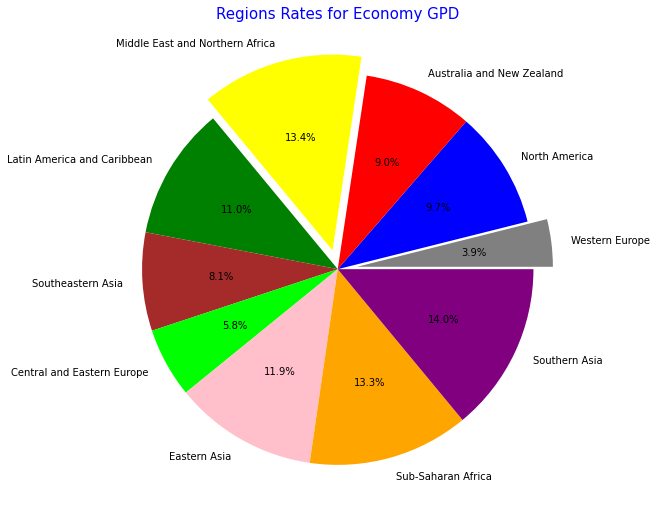

In [85]:
# Pie Chart
colors = ['grey','blue','red','yellow','green','brown','lime','pink','orange','purple']
explode = [0.1,0.0,0.0,0.1,0,0,0.0,0.0,0,0.0]
plt.figure(figsize = (10,9))
plt.pie(Economy_GPD_Capital, explode=explode, labels=data['Region'].unique(), colors=colors, autopct='%1.1f%%')
plt.title('Regions Rates for Economy GPD',color = 'blue',fontsize = 15)
plt.show()

In [86]:
ayrimcol=[]

for col in data.columns:
    print(col)
    ayrimcol.append(col.split())

Country
Region
Happiness_Rank
Happiness_Score
Standart_Error
Economy_GPD_Capital
Family
Healt_Life_Expectancy
Freedom
Trust_Goverment_Corruption
Generosity
Dystopia_Residual


----------------------------------------------------------------------


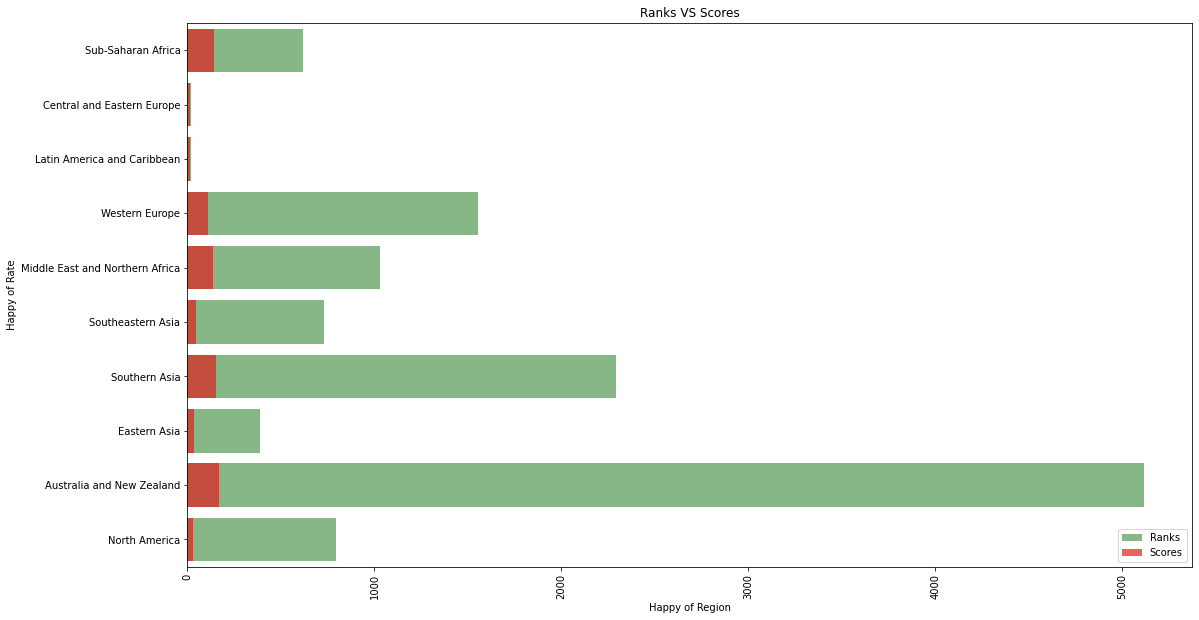

In [89]:
data.columns=['Country','Region','Happiness_Rank','Happiness_Score','Standart_Error','Economy_GPD_Capital','Family','Healt_Life_Expectancy','Freedom','Trust_Goverment_Corruption','Generosity','Dystopia_Residual']

happiess_ranks=[]
happiess_scores=[]
print('----------------------------------------------------------------------')
for i in data.Region.unique():
    happiess_ranks.append(sum(data[data['Region']==i].Happiness_Rank))
    happiess_scores.append(sum(data[data['Region']==i].Happiness_Score))

f,ax=plt.subplots(figsize=(18,10))
sns.barplot(y=data_rregion,x=happiess_ranks,color='green',alpha=0.5,label='Ranks')
sns.barplot(y=data_rregion,x=happiess_scores,color='red',alpha=0.7,label='Scores')
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Happy of Region',ylabel='Happy of Rate',title='Ranks VS Scores')
plt.xticks(rotation=90)
plt.show()

In [90]:
data[data['Freedom']==0]

,Country,Region,Happiness_Rank,Happiness_Score,Standart_Error,Economy_GPD_Capital,Family,Healt_Life_Expectancy,Freedom,Trust_Goverment_Corruption,Generosity,Dystopia_Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [91]:
data[data['Freedom']>0.66]

,Country,Region,Happiness_Rank,Happiness_Score,Standart_Error,Economy_GPD_Capital,Family,Healt_Life_Expectancy,Freedom,Trust_Goverment_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195


In [92]:
data.groupby('Region')['Trust_Goverment_Corruption'].mean()

Region
Australia and New Zealand          0.392795
Central and Eastern Europe         0.086674
Eastern Asia                       0.127695
Latin America and Caribbean        0.117172
Middle East and Northern Africa    0.181702
North America                      0.244235
Southeastern Asia                  0.151276
Southern Asia                      0.102536
Sub-Saharan Africa                 0.123878
Western Europe                     0.231463
Name: Trust_Goverment_Corruption, dtype: float64

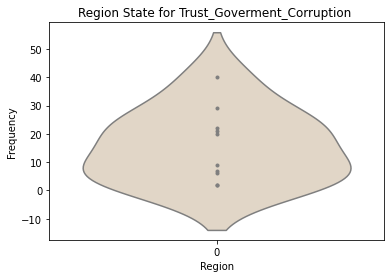

In [93]:
pal=sns.cubehelix_palette(2,rot=.5,dark=.3)
sns.violinplot(data=data.groupby('Region')['Trust_Goverment_Corruption'].count().values, palette=pal, inner="points",color='b')
#sns.violinplot(data=data.groupby('Region')['Freedom'].count().values, palette=pal, inner="points",color='r')
plt.title('Region State for Trust_Goverment_Corruption ')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

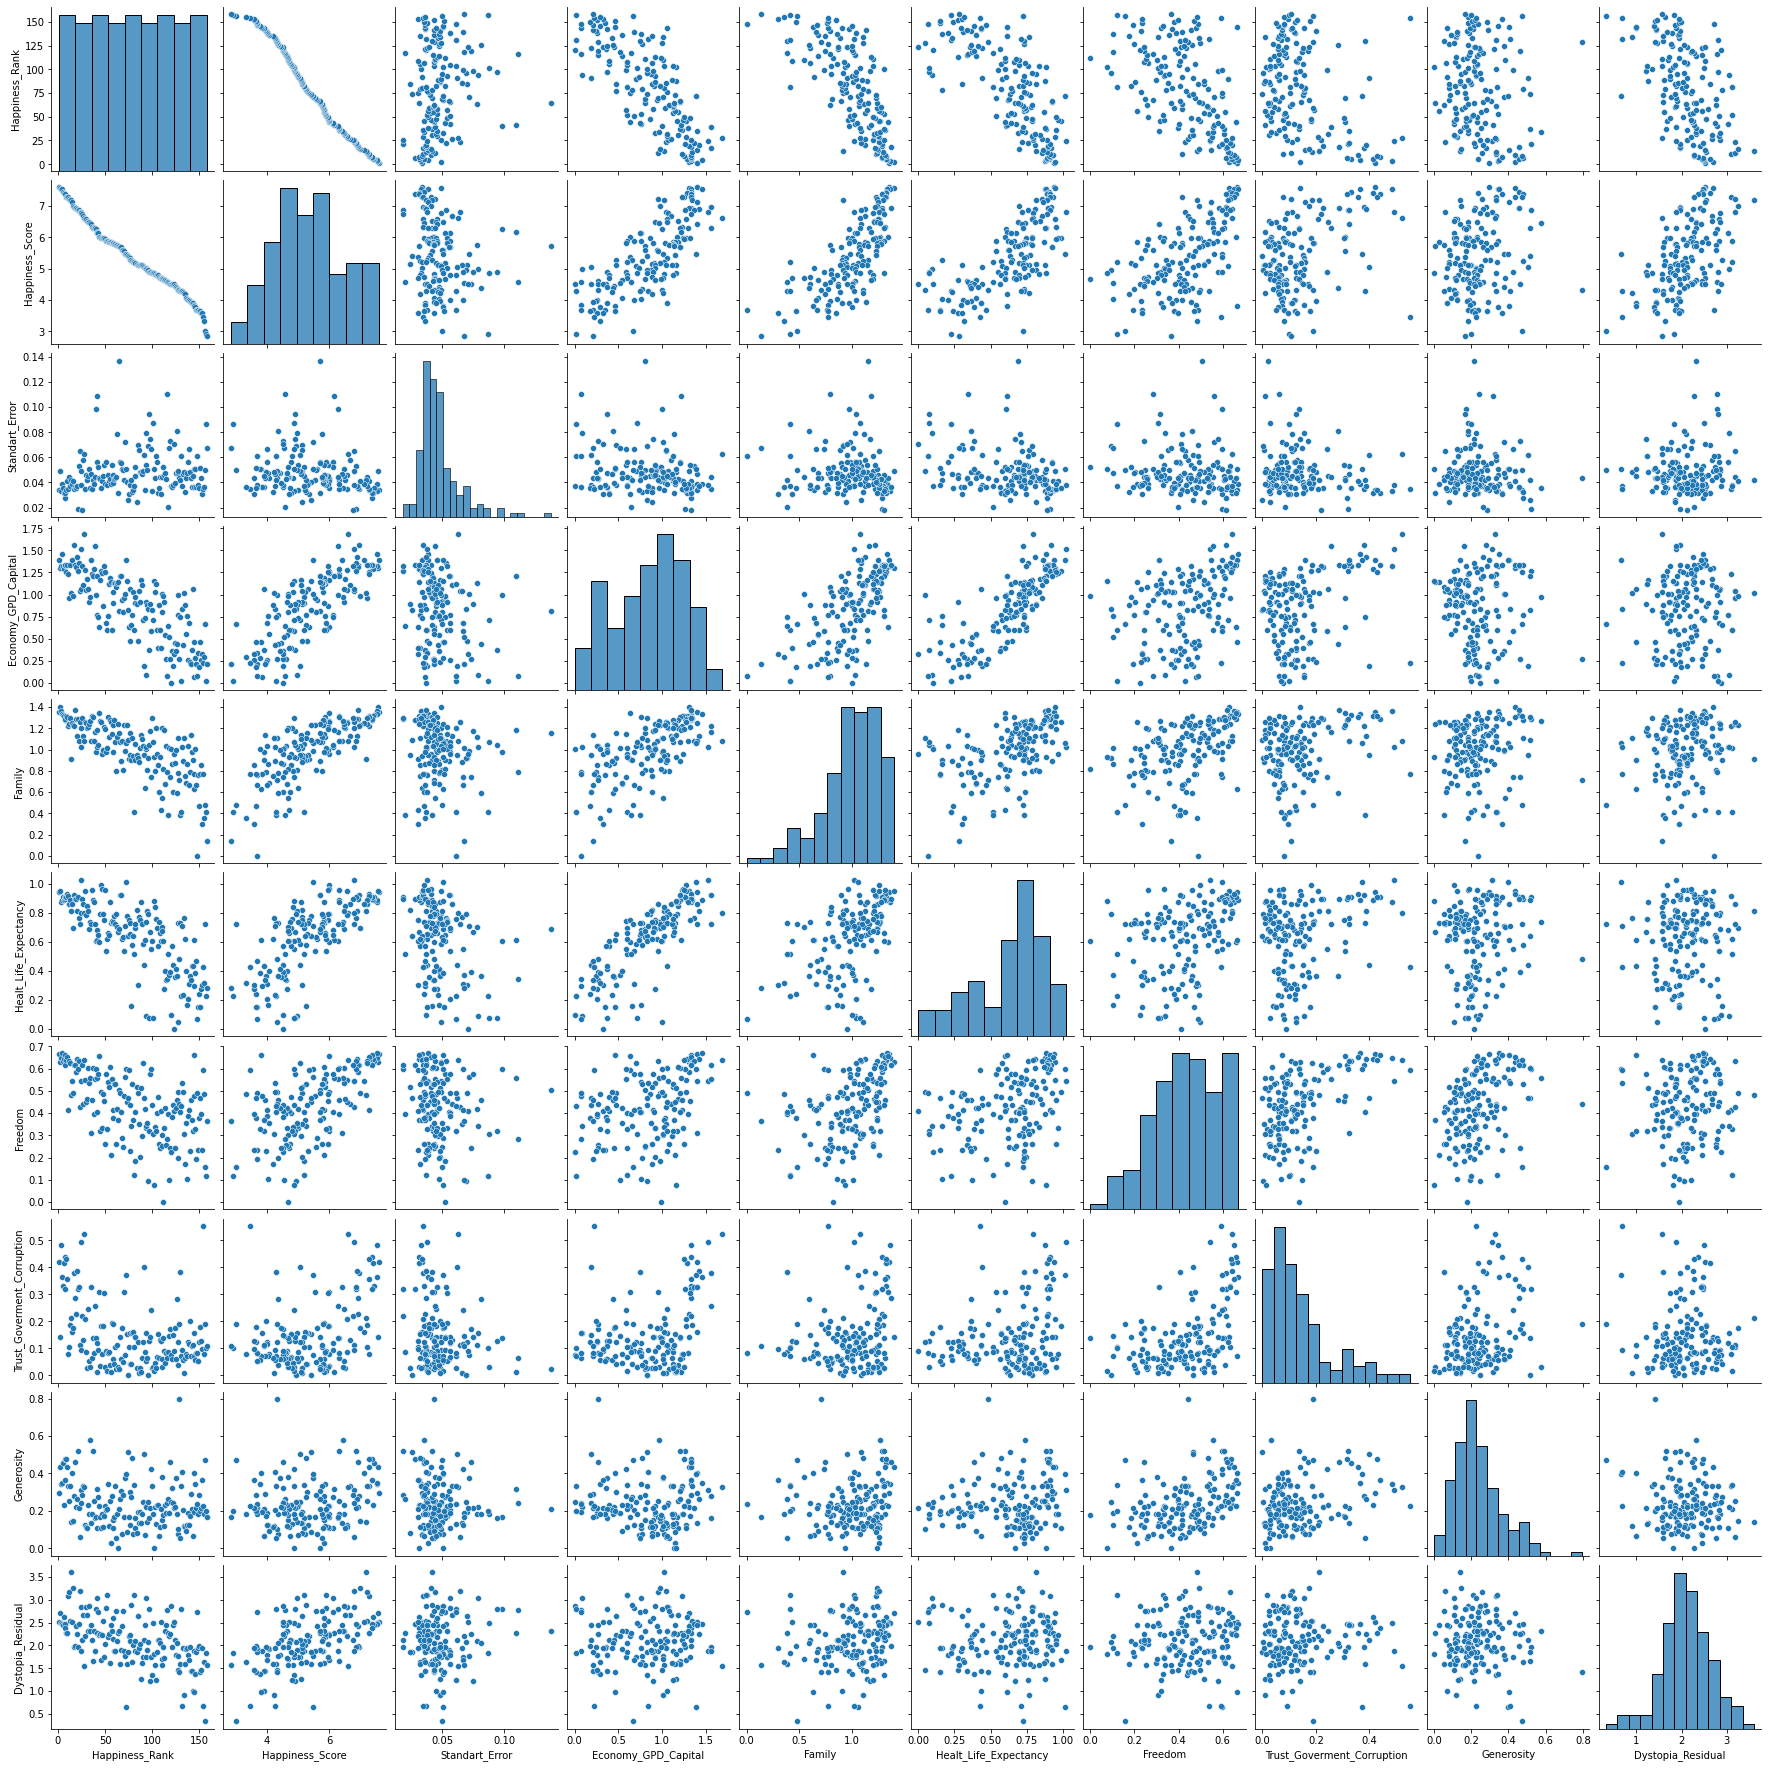

In [94]:
sns.pairplot(data)
plt.show()

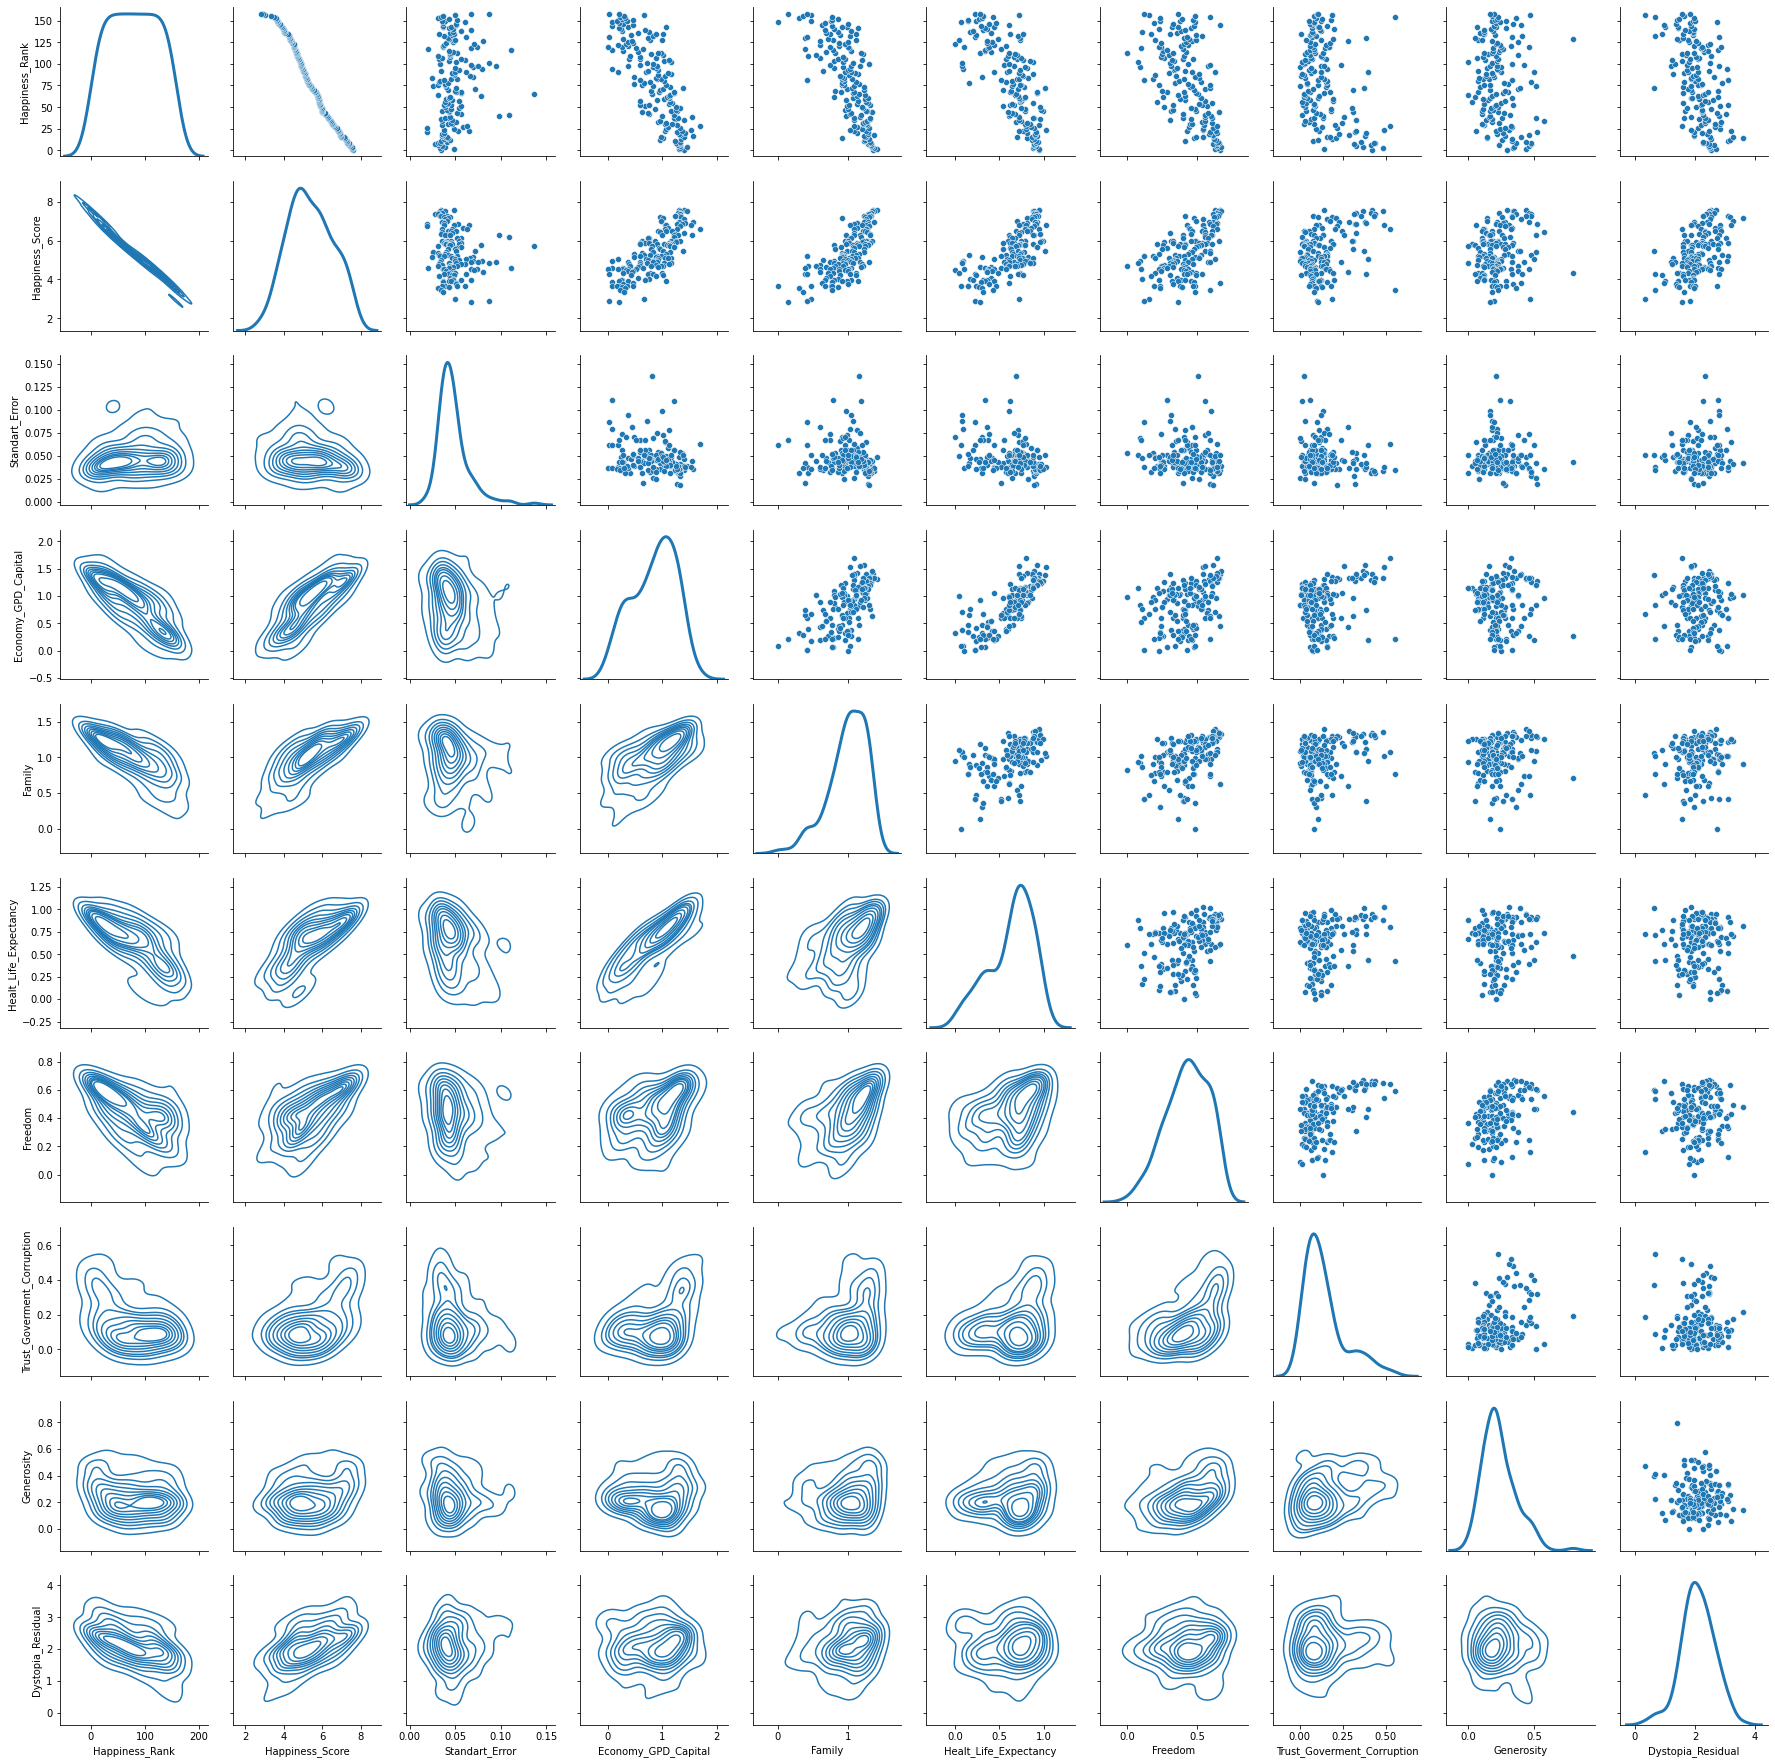

In [95]:
g = sns.PairGrid(data, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

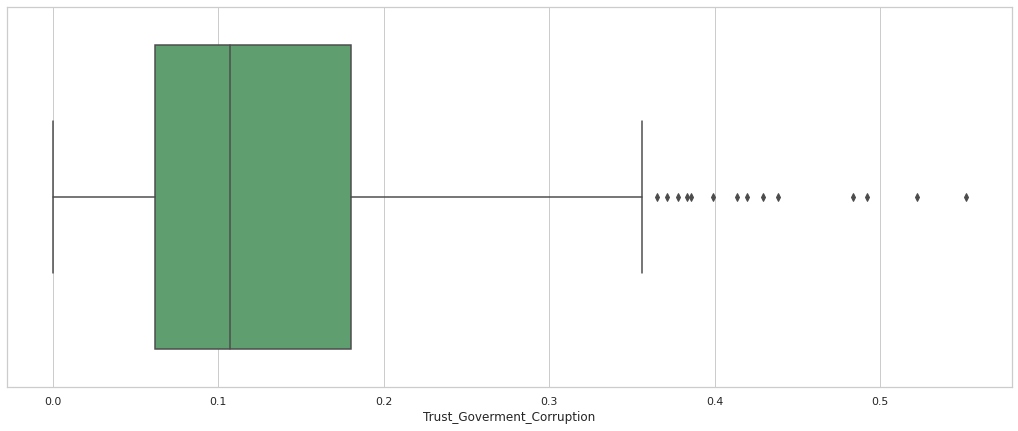

In [96]:
plt.figure(figsize=(18,7))
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Trust_Goverment_Corruption"],color='g')
plt.show()

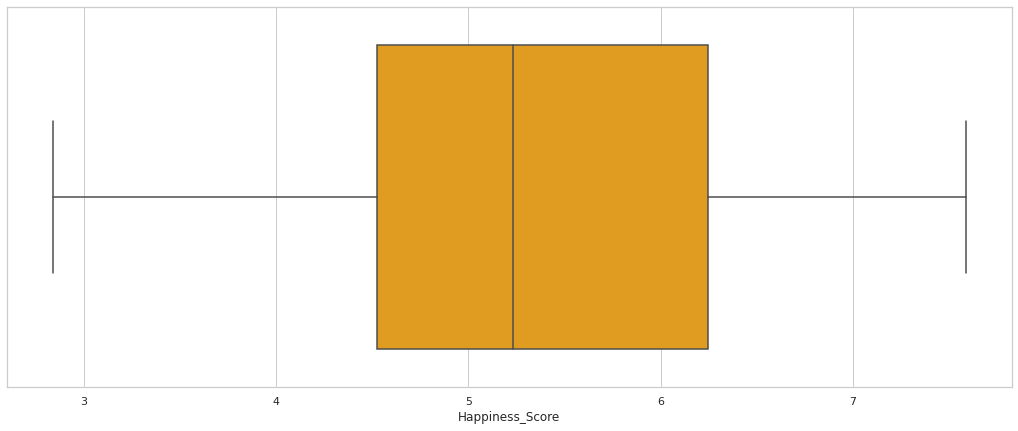

In [97]:
plt.figure(figsize=(18,7))
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Happiness_Score"],color='orange')
plt.show()

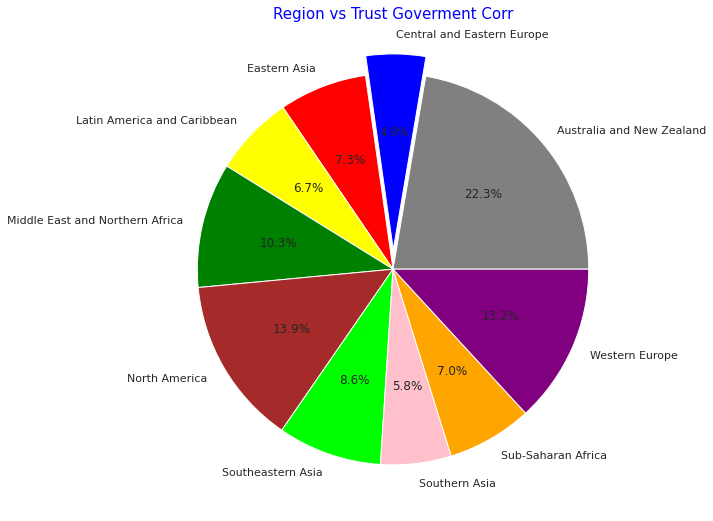

In [100]:
colors = ['grey','blue','red','yellow','green','brown','lime','pink','orange','purple']
explode = [0,0.1,0,0,0,0,0,0,0,0]
plt.figure(figsize = (10,9))
plt.pie(data.groupby('Region')['Trust_Goverment_Corruption'].mean().values, explode=explode, labels=data.groupby('Region')['Trust_Goverment_Corruption'].mean().index, colors=colors, autopct='%1.1f%%')
plt.title('Region vs Trust Goverment Corr',color = 'blue',fontsize = 15)
plt.show()

In [101]:
#we will now analyze the rates and situations of generosity relative to countries.
generosity=data.sort_values(by="Generosity",ascending="True")[:20].reset_index()
generosity=generosity.drop('index',axis=1)
generosity

,Country,Region,Happiness_Rank,Happiness_Score,Standart_Error,Economy_GPD_Capital,Family,Healt_Life_Expectancy,Freedom,Trust_Goverment_Corruption,Generosity,Dystopia_Residual
0,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101
1,Russia,Central and Eastern Europe,64,5.716,0.03135,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199,2.27394
2,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649
3,Croatia,Central and Eastern Europe,62,5.759,0.04394,1.08254,0.79624,0.78805,0.25883,0.02430,0.05444,2.75414
4,Georgia,Central and Eastern Europe,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541
5,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
6,Tunisia,Middle East and Northern Africa,107,4.739,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431,2.12466
7,Gabon,Sub-Saharan Africa,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895
8,Morocco,Middle East and Northern Africa,92,5.013,0.03420,0.73479,0.64095,0.60954,0.41691,0.08546,0.07172,2.45373
9,Azerbaijan,Central and Eastern Europe,80,5.212,0.03363,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799,2.00073


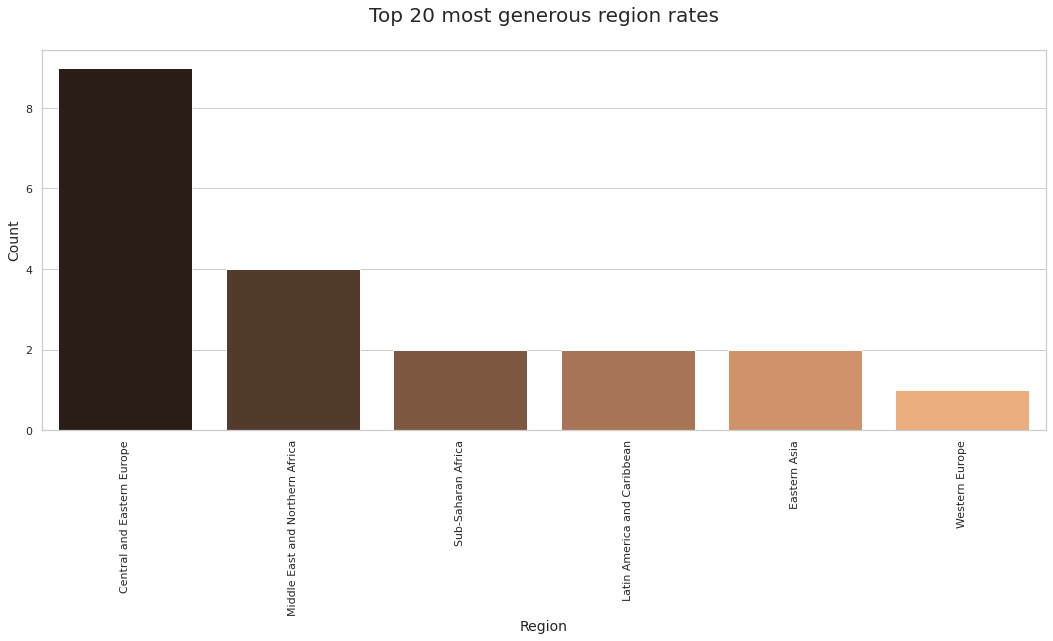

In [102]:
plt.figure(figsize=(18,7))
sns.barplot(x=generosity.Region.value_counts().index,y=generosity.Region.value_counts().values,palette='copper')
plt.xlabel("Region",size=14)
plt.ylabel("Count",size=14)
plt.xticks(rotation=90)
plt.title("Top 20 most generous region rates\n",size=20)
plt.show()

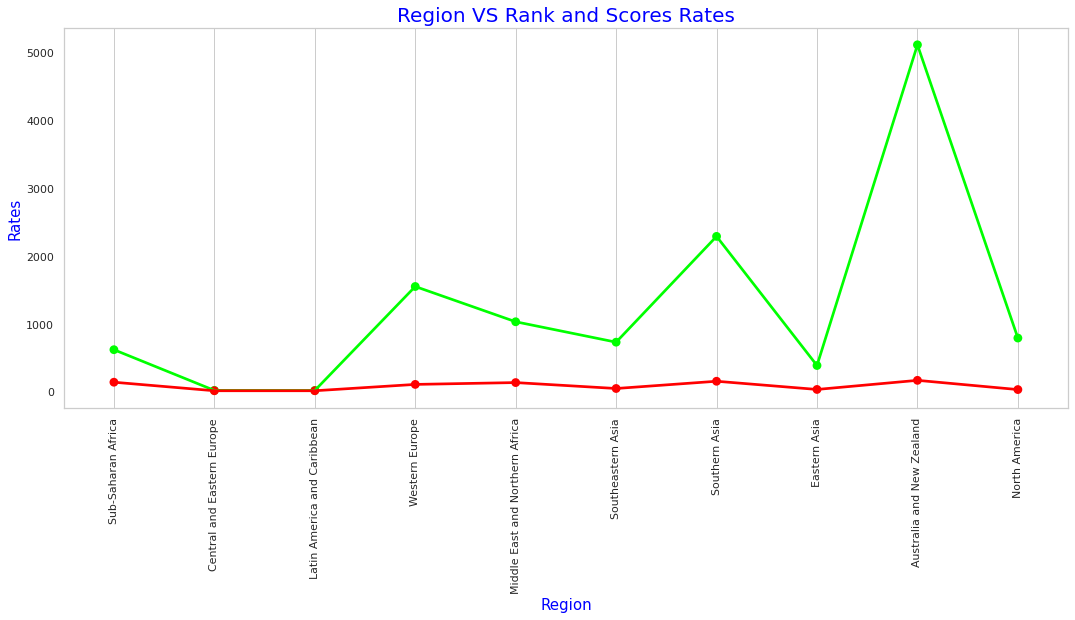

In [103]:
f,ax1=plt.subplots(figsize=(18,7))
sns.pointplot(x=data_rregion,y=happiess_ranks,data=data,color='lime',alpha=0.8)
sns.pointplot(x=data_rregion,y=happiess_scores,data=data,color='red',alpha=0.8)
plt.xlabel('Region',fontsize=15,color='blue')
plt.ylabel('Rates',fontsize=15,color='blue')
plt.title('Region VS Rank and Scores Rates',fontsize=20,color='blue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

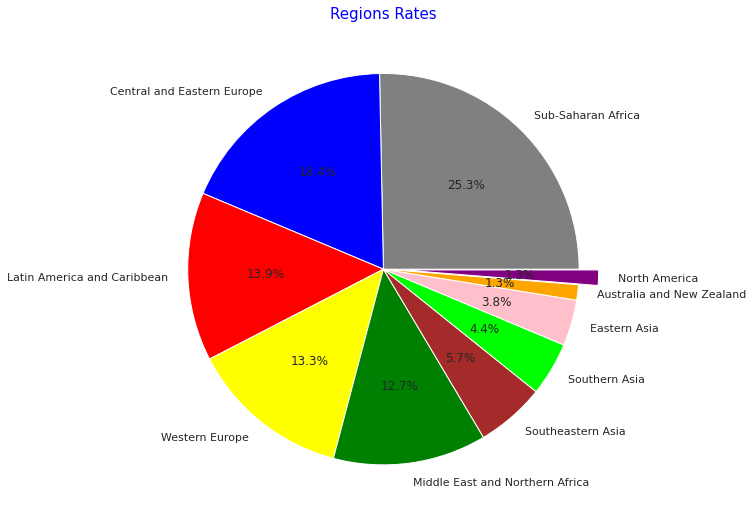

In [105]:
colors = ['grey','blue','red','yellow','green','brown','lime','pink','orange','purple']
explode = [0,0,0,0,0,0,0,0,0,0.1]
plt.figure(figsize = (10,9))
plt.pie(data_rvalues, explode=explode, labels=data_rregion, colors=colors, autopct='%1.1f%%')
plt.title('Regions Rates',color = 'blue',fontsize = 15)
plt.show()

In [106]:
print(data_rvalues)
print(len(data_rregion))

[40 29 22 21 20  9  7  6  2  2]
10


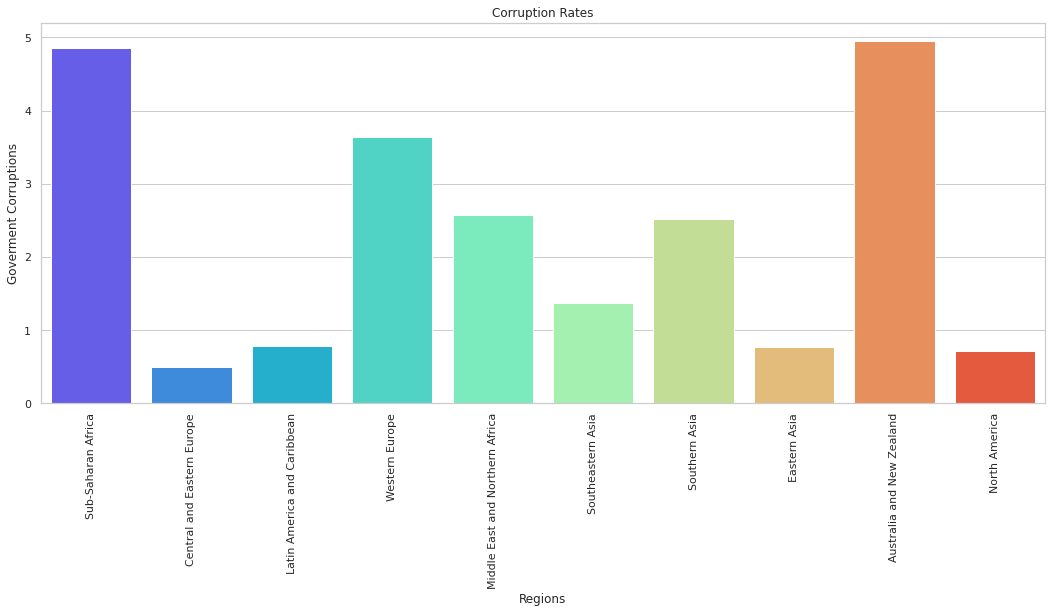

In [107]:
turst_goverment_corr=[]

for col in data.Region.unique():
    turst_goverment_corr.append(sum(data[data['Region']==col].Trust_Goverment_Corruption))
    

plt.figure(figsize=(18,7))
sns.barplot(x=data_rregion,y=turst_goverment_corr,palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.ylabel('Goverment Corruptions')
plt.title('Corruption Rates')
plt.show()

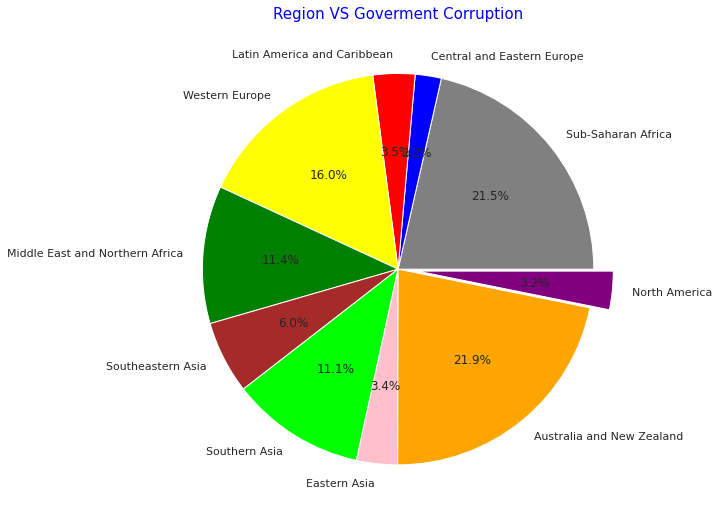

In [108]:
plt.figure(figsize=(10,9))
plt.pie(turst_goverment_corr,explode=explode,labels=data_rregion,colors=colors,autopct='%1.1f%%')
plt.title('Region VS Goverment Corruption',color='blue',fontsize=15)
plt.show()

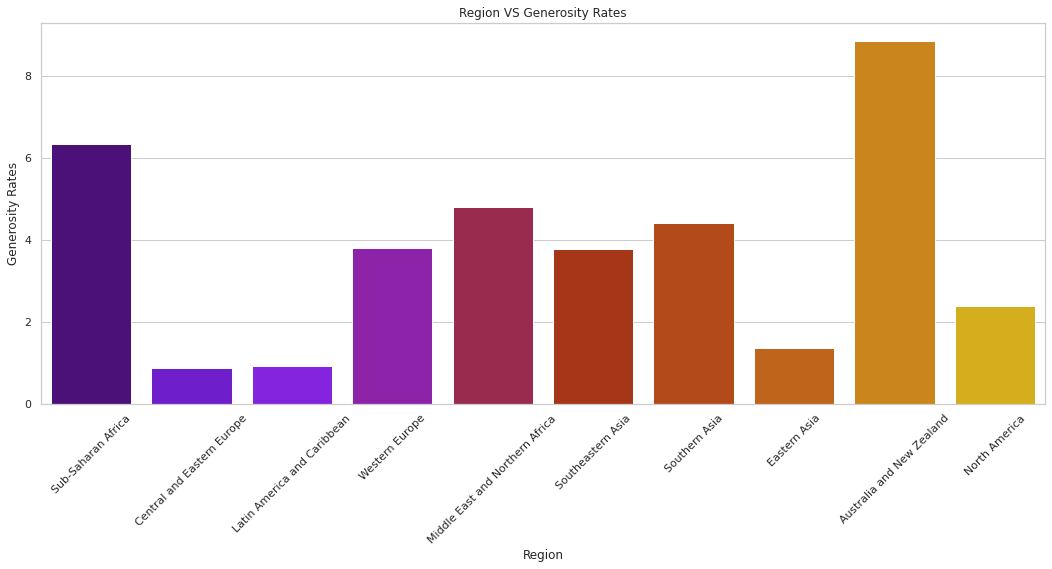

In [113]:
generosity=[]

for col in data.Region.unique():
    generosity.append(sum(data[data['Region']==col].Generosity))

plt.figure(figsize=(18,7))
sns.barplot(x=data_rregion,y=generosity,palette='gnuplot')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Generosity Rates')
plt.title('Region VS Generosity Rates')
plt.show()

In [114]:
min_d=generosity[0]
max_d=generosity[0]
i=0
min_i=0
max_i=0
for d in generosity:
    if min_d>generosity[i]:
        min_d=generosity[i]
        min_i=i
    elif max_d<generosity[i]:
        max_d=generosity[i]
        max_i=i
    i=i+1

print(data_rregion[0])
print('The most generosity Rates :'+(data_rregion[max_i]))
print('The less generosity Rates :'+(data_rregion[min_i]))

Sub-Saharan Africa
The most generosity Rates :Australia and New Zealand
The less generosity Rates :Central and Eastern Europe


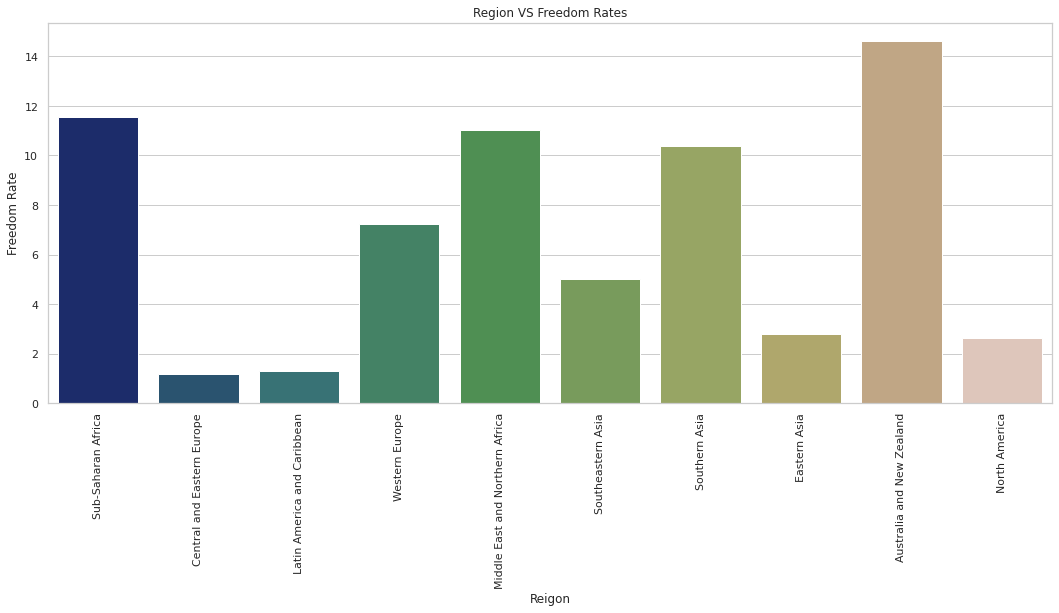

In [115]:
freedom=[]
for c in data.Region.unique():
    freedom.append(sum(data[data['Region']==c].Freedom))

plt.figure(figsize=(18,7))
sns.barplot(x=data_rregion,y=freedom,palette='gist_earth')
plt.xticks(rotation=90)
plt.xlabel('Reigon')
plt.ylabel('Freedom Rate')
plt.title('Region VS Freedom Rates')
plt.show()

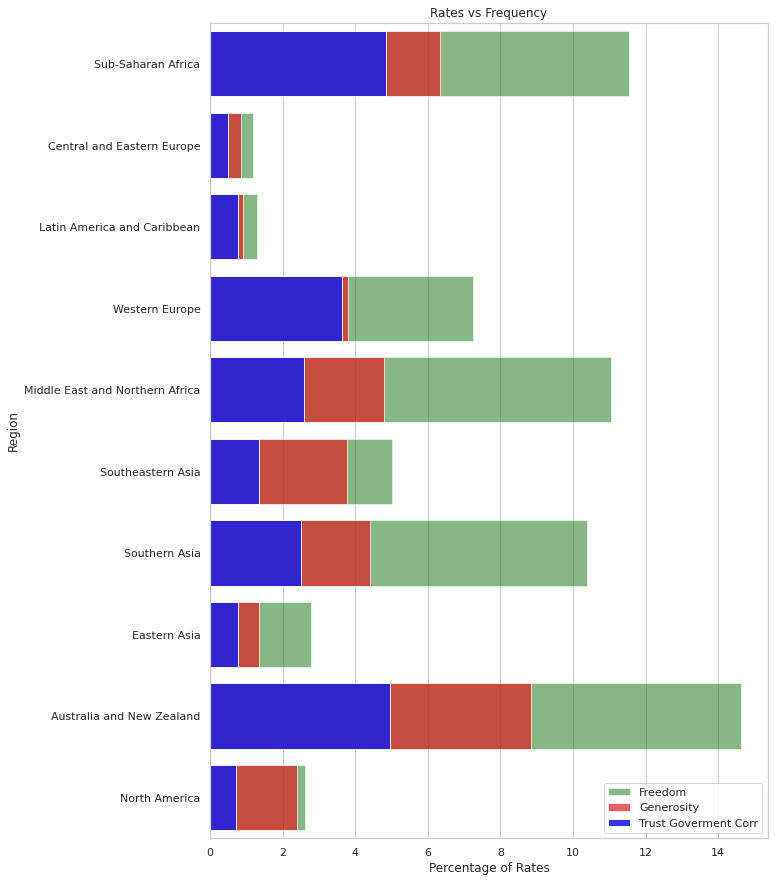

In [117]:
f2,ax2=plt.subplots(figsize=(10,15))
sns.barplot(x=freedom,y=data_rregion,label='Freedom',color='green',alpha=0.5)
sns.barplot(x=generosity,y=data_rregion,label='Generosity',color='red',alpha=0.7)
sns.barplot(x=turst_goverment_corr,y=data_rregion,label='Trust Goverment Corr',color='blue',alpha=0.9)
ax2.legend(loc='lower right',frameon = True)
ax2.set(xlabel='Percentage of Rates', ylabel='Region',title = "Rates vs Frequency")
plt.show()

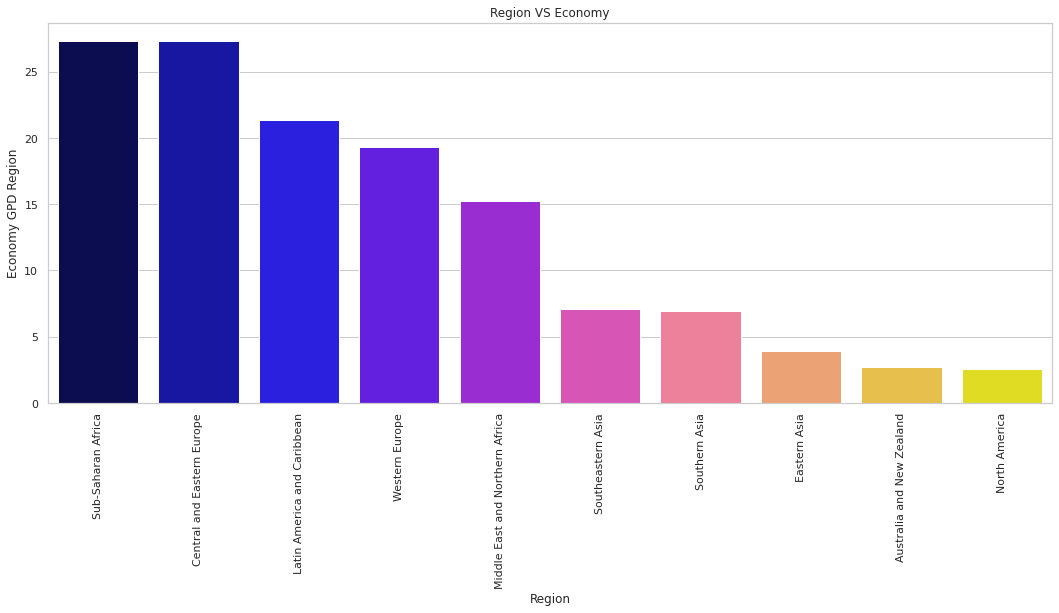

In [118]:
economy_gpd_capital=[]
for c in data.Region.unique():
    economy_gpd_capital.append(sum(data[data['Region']==c].Economy_GPD_Capital))


economy_gpd_capital.sort(reverse=True)

plt.figure(figsize=(18,7))
sns.barplot(x=data_rregion,y=economy_gpd_capital,palette='gnuplot2')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Economy GPD Region')
plt.title('Region VS Economy')
plt.show()    

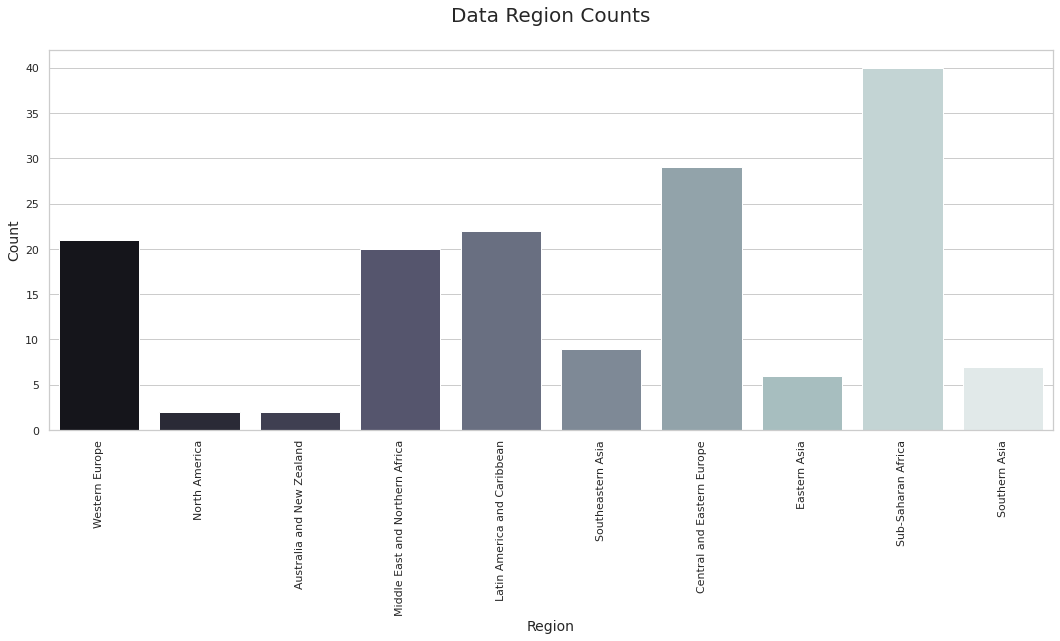

In [122]:
plt.figure(figsize=(18,7))
sns.countplot(x=data.Region,palette='bone')
plt.title('Data Region Counts\n',size=20)
plt.xticks(rotation=90)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show() 

In [123]:
data.groupby('Region')[['Healt_Life_Expectancy','Freedom','Trust_Goverment_Corruption','Generosity']].mean()

,Healt_Life_Expectancy,Freedom,Trust_Goverment_Corruption,Generosity
Region,,,,
Australia and New Zealand,0.919965,0.645310,0.392795,0.455315
Central and Eastern Europe,0.718774,0.358269,0.086674,0.152264
Eastern Asia,0.877388,0.462490,0.127695,0.225885
Latin America and Caribbean,0.703870,0.501740,0.117172,0.217788
Middle East and Northern Africa,0.705616,0.361751,0.181702,0.190375
North America,0.883710,0.589505,0.244235,0.429580
Southeastern Asia,0.677357,0.557104,0.151276,0.419261
Southern Asia,0.540830,0.373337,0.102536,0.341429
Sub-Saharan Africa,0.282332,0.365944,0.123878,0.221137


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

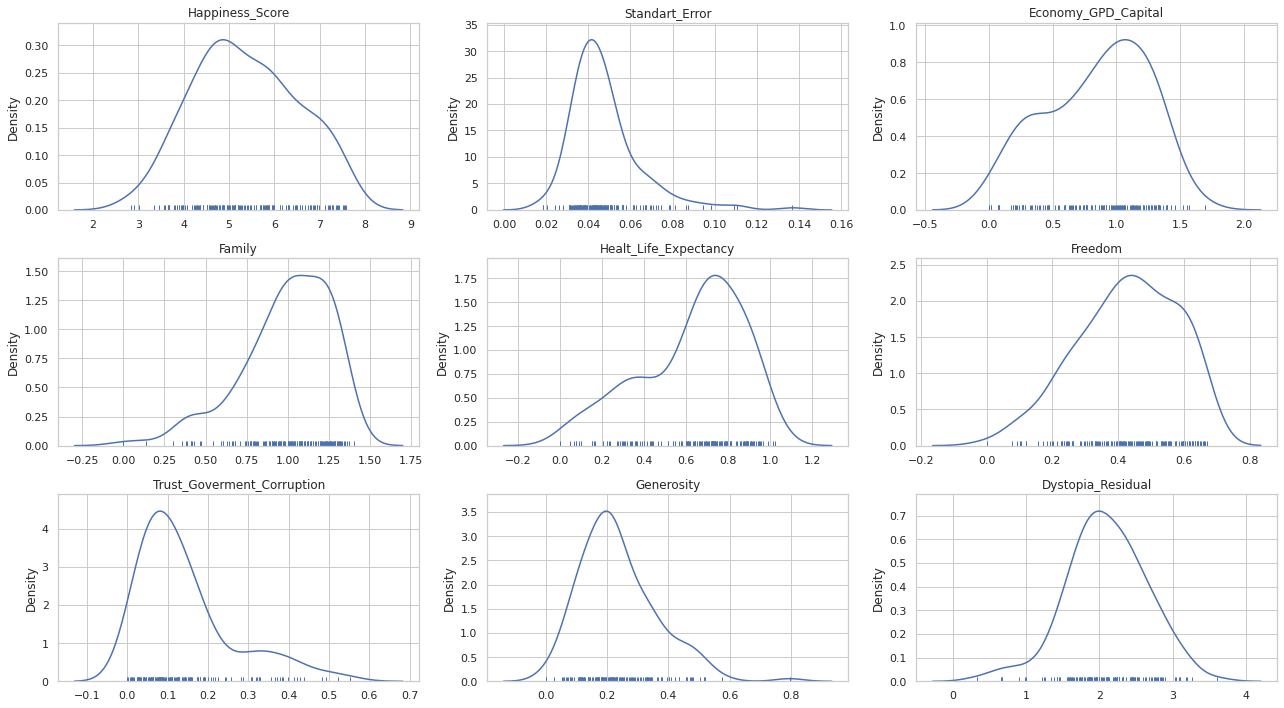

In [125]:
for i,col in enumerate(data.columns[3:]):
    plt.subplot(3,3,i+1)
    ax = sns.distplot(x = data[col], rug=True, hist=False)
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(18,10)
    plt.tight_layout()
plt.show()

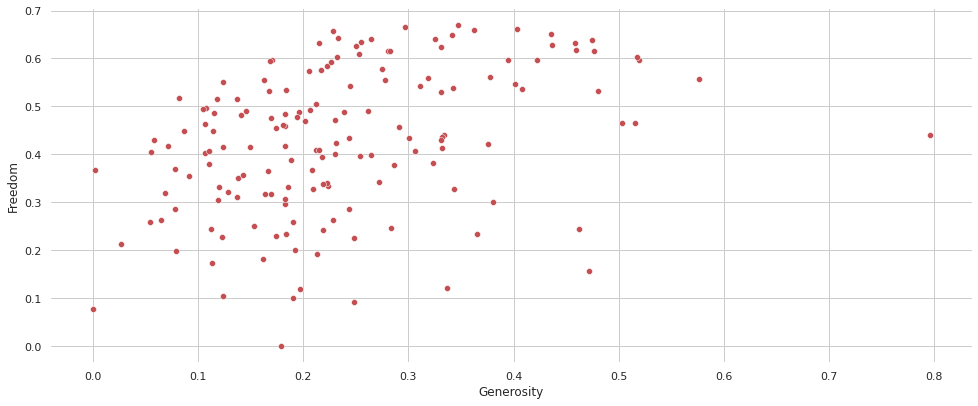

In [127]:
f, ax = plt.subplots(figsize=(16.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Generosity", y="Freedom",data=data,color='r')
plt.show()

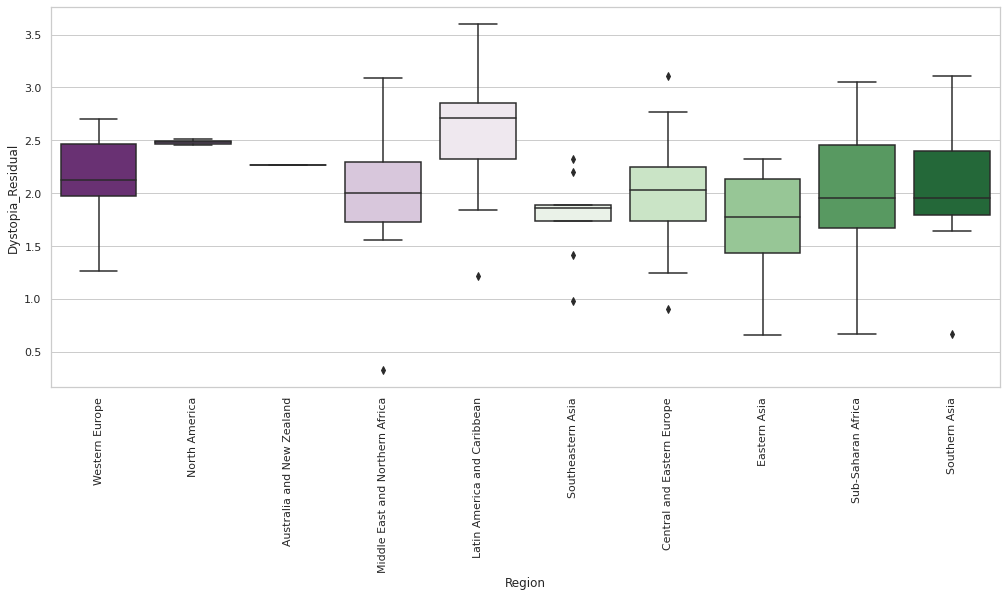

In [128]:
plt.figure(figsize=(17,7))
sns.boxplot(x='Region',y='Dystopia_Residual',data=data,palette='PRGn')
plt.xticks(rotation=90)
plt.show()

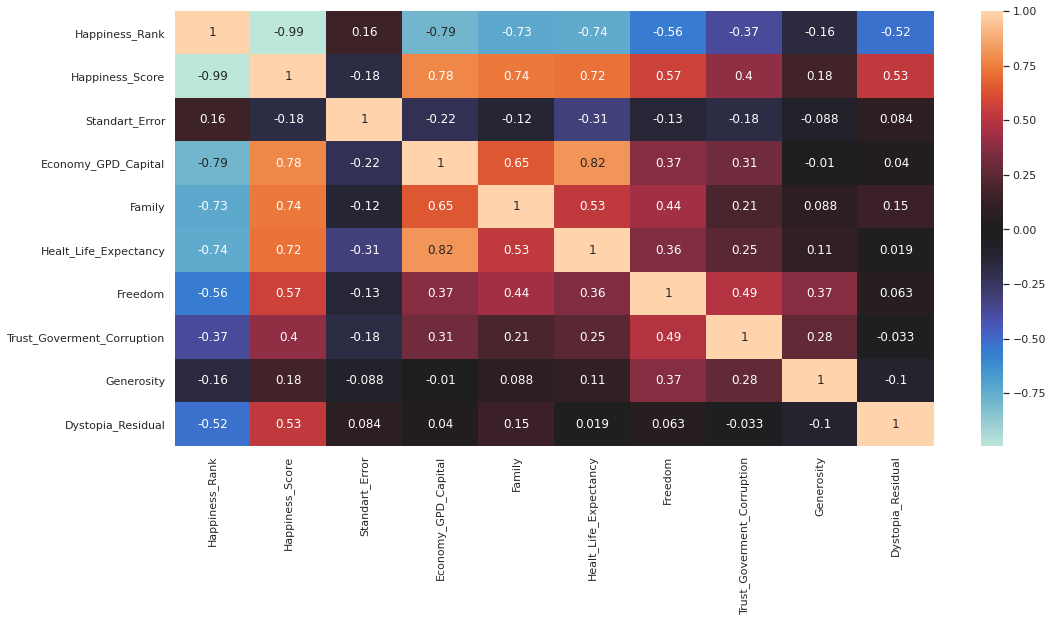

In [129]:
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(), annot = True, cmap='icefire')
plt.show()

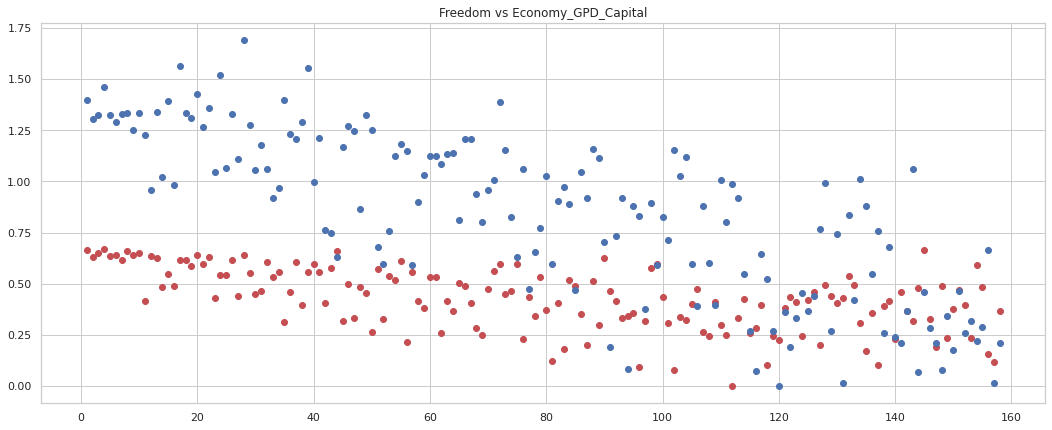

In [131]:
plt.figure(figsize=(18,7))
plt.scatter(x=np.arange(1,159),y=data['Freedom'],color='r')
plt.scatter(x=np.arange(1,159),y=data['Economy_GPD_Capital'],color='b')
plt.title('Freedom vs Economy_GPD_Capital')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


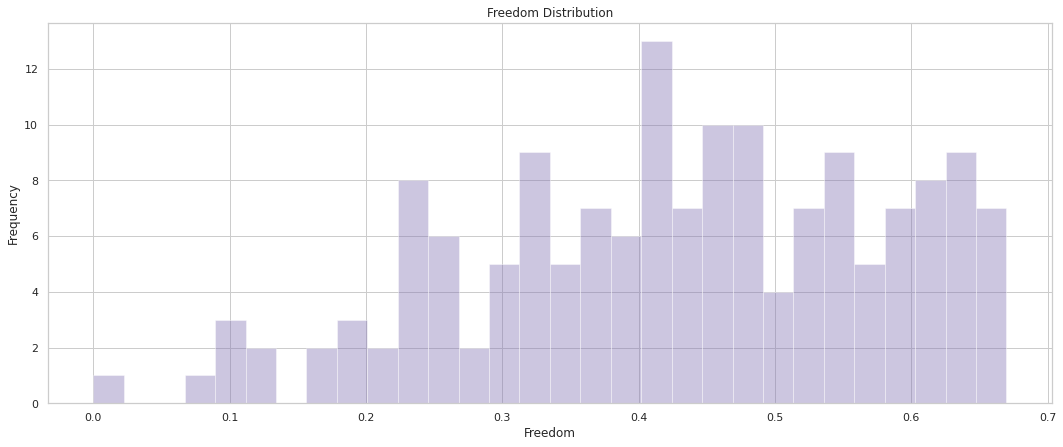

In [132]:
plt.figure(figsize=(18,7))
sns.distplot(data['Freedom'], kde = False, color='m', bins = 30)
plt.ylabel('Frequency')
plt.title('Freedom Distribution')
plt.show()